In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Let's us read the input data
df = pd.read_csv('/content/drive/MyDrive/TFM/data/export_expedientes_cleaned.csv', sep=',', encoding='UTF8')
df.head()

,id_capitulo,id_concepto,id_partida_generica,descripcion,clean_text
0,3000,3300,3390,SERVICIOS PROFESIONALES CONSISTENTES EN LA COO...,servicio profesional consistente coordinación ...
1,3000,3300,3390,SERVICIOS PROFESIONALES CONSISTENTES EN COADYU...,servicio profesional consistente coadyuvar des...
2,3000,3300,3390,SERVICIOS PROFESIONALES CONSISTENTES EN COADYU...,servicio profesional consistente coadyuvar man...
3,3000,3300,3390,SERVICIOS PROFESIONALES CONSISTENTES EN COADYU...,servicio profesional consistente coadyuvar log...
4,3000,3300,3390,SERVICIOS PROFESIONALES CONSISTENTES EN COADYU...,servicio profesional consistente coadyuvar log...


In [4]:
df.groupby(['id_concepto']).count()

,id_capitulo,id_partida_generica,descripcion,clean_text
id_concepto,,,,
2100,19225,19225,19225,19225
2200,10327,10327,10327,10327
2300,108601,108601,108601,108601
2400,9815,9815,9815,9815
2500,91712,91712,91712,91712
2600,6284,6284,6284,6284
2700,7244,7244,7244,7244
2800,591,591,591,591
2900,11703,11703,11703,11703


#CAPITULO

In [ ]:
# Everything looks ok. Now let's do the train-split as we did before.
X = df['descripcion'] # Text
Y = df['id_capitulo'] # Labels

In [ ]:
# Train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle = True, random_state=0)

In [ ]:
y_train.groupby(y_train).size()

id_capitulo
2000    217283
3000    215805
5000     14084
6000     53762
Name: id_capitulo, dtype: int64

In [ ]:
y_test.groupby(y_test).size()

id_capitulo
2000    54321
3000    53952
5000     3521
6000    13440
Name: id_capitulo, dtype: int64

In [ ]:
#For large datasets consider using LinearSVC
model = LinearSVC(C=1.0, penalty='l2', class_weight='balanced', random_state=42, max_iter=1000, verbose=1)

In [ ]:
#Model
clf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                    tokenizer=word_tokenize,
                                    strip_accents='ascii',
                                    max_features=None,
                                    lowercase=True)),
    ('svm', model)
])
clf.fit(X_train, y_train)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('vectorizer',
                 CountVectorizer(strip_accents='ascii',
                                 tokenizer=<function word_tokenize at 0x7f5e02271c20>)),
                ('svm',
                 LinearSVC(class_weight='balanced', random_state=42,
                           verbose=1))])

In [ ]:
# Let's see the results
y_pred = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2000       0.96      0.96      0.96     54321
        3000       0.96      0.95      0.95     53952
        5000       0.64      0.74      0.69      3521
        6000       0.94      0.95      0.94     13440

    accuracy                           0.95    125234
   macro avg       0.87      0.90      0.89    125234
weighted avg       0.95      0.95      0.95    125234



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

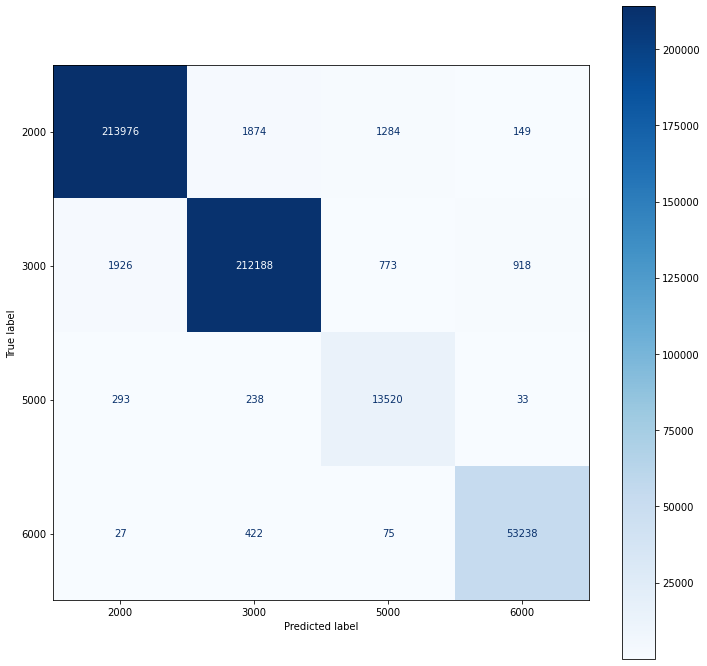

In [ ]:
#Confusion matrix train
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
metrics.plot_confusion_matrix(clf, X_train, y_train, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

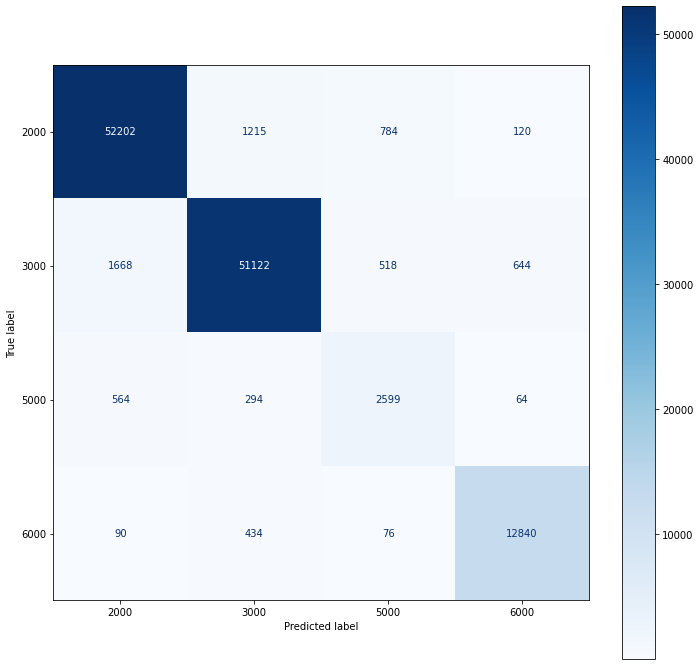

In [ ]:
#Confusion matrix test
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 

In [ ]:
# Finally, let's try the examples again:
test = clf.predict(["Semillas para la siembra",
                   "Alquiler en bar del paramo",
                   "Obras de metro y remodelación", 
                   "Materiales de oficina", 
                   "Grúas para demolición",
                   "Gruas para demolicion"])
test

array([2000, 3000, 6000, 2000, 6000, 6000])

In [ ]:
df.groupby(['id_concepto']).count()['descripcion']

id_concepto
2100     20009
2200     10443
2300    108849
2400     10234
2500     95718
2600      6328
2700      7415
2800       611
2900     11997
3100     12598
3200     12403
3300    154451
3400      5518
3500     64458
3600      7698
3700      3150
3800      2790
3900      6691
5100      5066
5200       932
5300      5501
5400      1593
5500       137
5600      3311
5700        62
5800       583
5900       420
6100     48305
6200     17458
6300      1439
Name: descripcion, dtype: int64

#CONCEPTO

In [9]:
# Now for concepts
X = df['descripcion'] # Text
Y = df['id_concepto'] # Labels

In [10]:
# Para solo mantener el valor númerico sin ceros 
Y = Y.apply(lambda division: str(int(division/100.0)))

In [13]:
# Train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle = True, random_state=0)

In [16]:
#La proporcion de training and testing
print(X_train.shape)
print(X_test.shape)

(493653,)
(123414,)


In [14]:
y_train.groupby(y_train).size()

id_concepto
21     15380
22      8262
23     86881
24      7852
25     73370
26      5027
27      5795
28       473
29      9362
31      9950
32      9887
33    123053
34      4404
35     50869
36      6060
37      2477
38      2228
39      5166
51      3907
52       730
53      4276
54      1250
55       108
56      2537
57        50
58       466
59       331
61     38426
62     13930
63      1146
Name: id_concepto, dtype: int64

In [15]:
y_test.groupby(y_test).size()

id_concepto
21     3845
22     2065
23    21720
24     1963
25    18342
26     1257
27     1449
28      118
29     2341
31     2488
32     2472
33    30763
34     1101
35    12717
36     1515
37      619
38      557
39     1292
51      977
52      183
53     1069
54      313
55       27
56      634
57       12
58      116
59       82
61     9607
62     3483
63      287
Name: id_concepto, dtype: int64

In [17]:
def multi_label_metrics(y_true,y_pred):
    # compute metrics
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
   
    # return as dictionary
    metrics = {'balanced_accuracy_score': balanced_accuracy,
               'accuracy': accuracy}
    return metrics

In [18]:
def describe_performance(gridSearchCVModel, y_test, y_pred):
  print("Best parameters set found on training set:")
  print()
  print("best parameters: ",gridSearchCVModel.best_params_)
  print()
  print("Grid scores on testing set:")
  print()
  means_score = gridSearchCVModel.cv_results_["mean_test_score"]
  stds_scroe = gridSearchCVModel.cv_results_["std_test_score"]
  for mean, std, params in zip(means_score, stds_scroe, gridSearchCVModel.cv_results_["params"]):
      print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
  print()
  print("best score: ", gridSearchCVModel.best_score_)
  print()
  print("Grid times on testing set:")
  print()
  means_fit_time = gridSearchCVModel.cv_results_["mean_fit_time"]
  std_fit_time = gridSearchCVModel.cv_results_["std_fit_time"]
  for mean, std, params in zip(means_fit_time, std_fit_time, gridSearchCVModel.cv_results_["params"]):
      print("%0.3f seconds (+/-%0.03f) for %r" % (mean, std * 2, params))
  print("Detailed classification report:")
  print()
  print("The model is trained on the full training set.")
  print("The scores are computed on the full testing set.")
  print()
  print(multi_label_metrics(y_test, y_pred))
  print(metrics.classification_report(y_test, y_pred))
  print()

In [19]:
def plot_confusion_matrix(y_test, y_pred):
  #Confusion matrix test
  plt.clf()
  fig,ax = plt.subplots(figsize=(22,22))
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues,  ax=ax, values_format='d')
  plt.show() 

##MultinomialNB

In [ ]:
#Model and hyperparameters
from sklearn.naive_bayes import ComplementNB
parametersMNB = { 
                 'vectorizer__ngram_range': [(1,3)],
                 'MNB__alpha':[0, 0.5, 1.0]
                 }
modelMNB = ComplementNB()

In [21]:
#Model and hyperparameters
parametersMNB = { 
                 'vectorizer__ngram_range': [(1,1), (1,2), (1,3)],
                 'MNB__alpha':[0, 0.5, 1.0]
                 }
modelMNB = MultinomialNB()

In [22]:
#Model
clfMNB = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                    tokenizer=word_tokenize,
                                    strip_accents='ascii',
                                    max_features=None,
                                    lowercase=True)),
    ('MNB', modelMNB)
])
clf_MNB_GS = GridSearchCV(clfMNB, parametersMNB, cv=3, n_jobs=-1, verbose=3)
clf_MNB_GS.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(strip_accents='ascii',
                                                        tokenizer=<function word_tokenize at 0x7ff1996f53b0>)),
                                       ('MNB', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'MNB__alpha': [0, 0.5, 1.0],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=3)

In [23]:
#Model predictions
y_pred = clf_MNB_GS.predict(X_test)

In [24]:
#Model performance
describe_performance(clf_MNB_GS, y_test, y_pred)

Best parameters set found on training set:

best parameters:  {'MNB__alpha': 0, 'vectorizer__ngram_range': (1, 3)}

Grid scores on testing set:

0.825 (+/-0.002) for {'MNB__alpha': 0, 'vectorizer__ngram_range': (1, 1)}
0.851 (+/-0.001) for {'MNB__alpha': 0, 'vectorizer__ngram_range': (1, 2)}
0.867 (+/-0.002) for {'MNB__alpha': 0, 'vectorizer__ngram_range': (1, 3)}
0.820 (+/-0.001) for {'MNB__alpha': 0.5, 'vectorizer__ngram_range': (1, 1)}
0.840 (+/-0.001) for {'MNB__alpha': 0.5, 'vectorizer__ngram_range': (1, 2)}
0.852 (+/-0.001) for {'MNB__alpha': 0.5, 'vectorizer__ngram_range': (1, 3)}
0.797 (+/-0.001) for {'MNB__alpha': 1.0, 'vectorizer__ngram_range': (1, 1)}
0.818 (+/-0.001) for {'MNB__alpha': 1.0, 'vectorizer__ngram_range': (1, 2)}
0.832 (+/-0.001) for {'MNB__alpha': 1.0, 'vectorizer__ngram_range': (1, 3)}

best score:  0.8673785027134445

Grid times on testing set:

128.920 seconds (+/-15.866) for {'MNB__alpha': 0, 'vectorizer__ngram_range': (1, 1)}
140.488 seconds (+/-2.245) for

<Figure size 432x288 with 0 Axes>

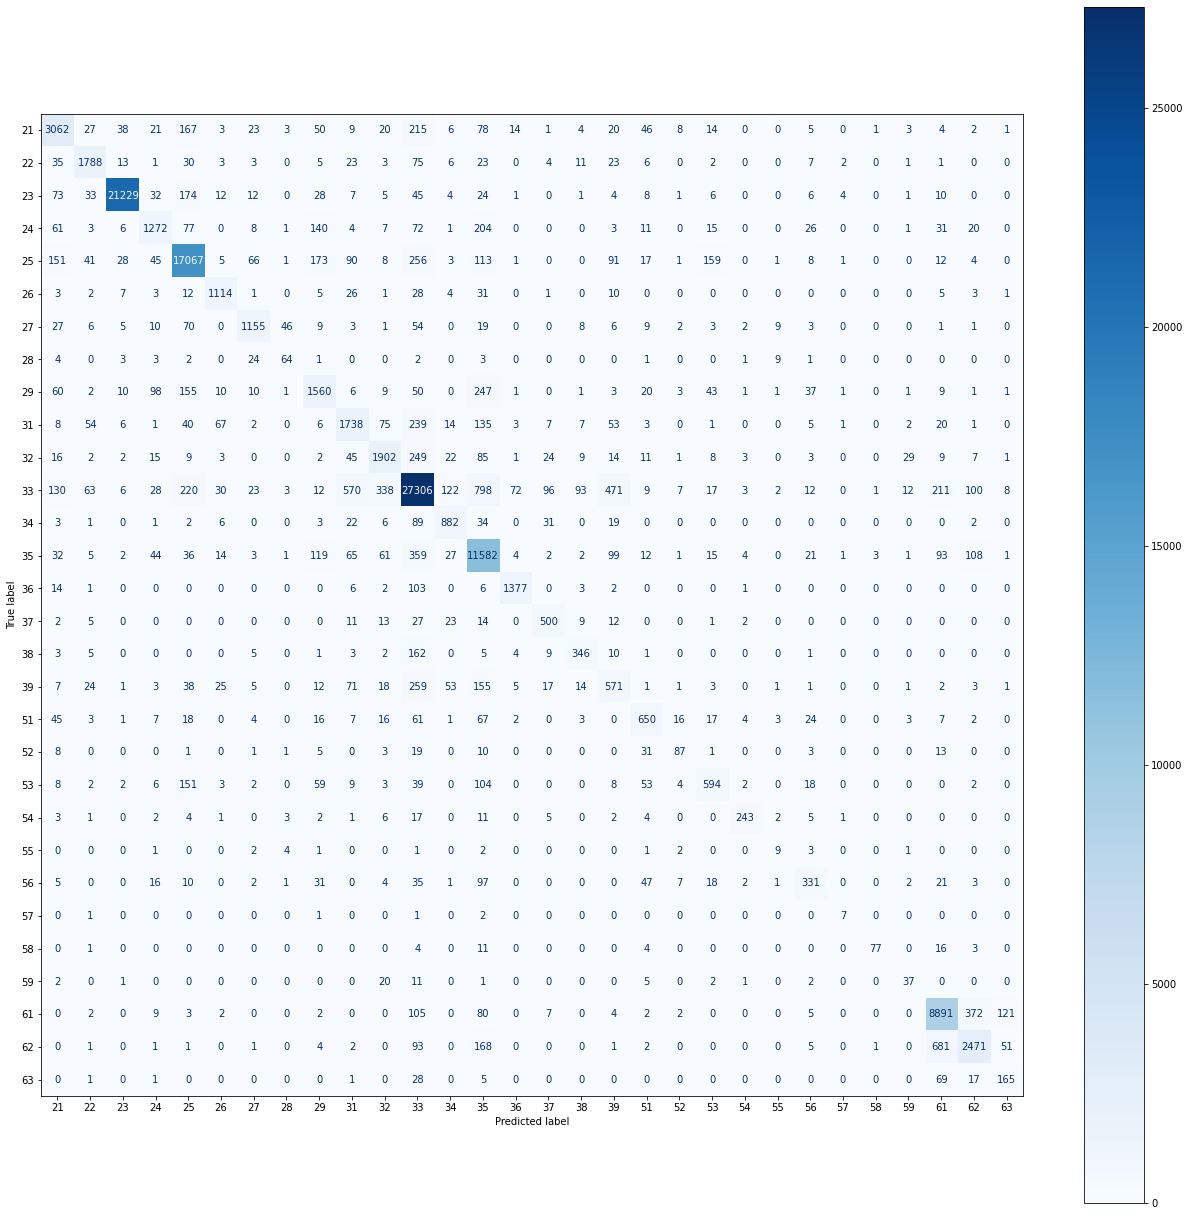

In [25]:
#Confusion Matrix 
plot_confusion_matrix(y_test, y_pred)

##LinearSVM

In [27]:
#Model and hyperparameters
parametersSVM = { 
                 'SVM__max_iter':[200, 300, 500],
                 'SVM__C':[0.1, 1]
                 }
modelSVM = LinearSVC(C=1.0, penalty='l2', 
                  class_weight='balanced', 
                  random_state=42, 
                  max_iter=1000, 
                  verbose=3)

In [28]:
#Model
clf_SVM = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                    ngram_range = (1,3),
                                    tokenizer=word_tokenize,
                                    strip_accents='ascii',
                                    max_features=None,
                                    lowercase=True)),
    ('SVM', modelSVM)
])

clf_GS_SVM = GridSearchCV(clf_SVM, parametersSVM, cv=2, n_jobs=-1, verbose=3)
clf_GS_SVM.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(ngram_range=(1, 3),
                                                        strip_accents='ascii',
                                                        tokenizer=<function word_tokenize at 0x7ff1996f53b0>)),
                                       ('SVM',
                                        LinearSVC(class_weight='balanced',
                                                  random_state=42,
                                                  verbose=3))]),
             n_jobs=-1,
             param_grid={'SVM__C': [0.1, 1], 'SVM__max_iter': [200, 300, 500]},
             verbose=3)

In [29]:
#Model predictions
y_pred = clf_GS_SVM.predict(X_test)

In [30]:
#Model performance
describe_performance(clf_GS_SVM, y_test, y_pred)

Best parameters set found on training set:

best parameters:  {'SVM__C': 0.1, 'SVM__max_iter': 300}

Grid scores on testing set:

0.892 (+/-0.000) for {'SVM__C': 0.1, 'SVM__max_iter': 200}
0.892 (+/-0.000) for {'SVM__C': 0.1, 'SVM__max_iter': 300}
0.892 (+/-0.000) for {'SVM__C': 0.1, 'SVM__max_iter': 500}
0.889 (+/-0.000) for {'SVM__C': 1, 'SVM__max_iter': 200}
0.889 (+/-0.000) for {'SVM__C': 1, 'SVM__max_iter': 300}
0.889 (+/-0.000) for {'SVM__C': 1, 'SVM__max_iter': 500}

best score:  0.8924446924351126

Grid times on testing set:

532.052 seconds (+/-10.544) for {'SVM__C': 0.1, 'SVM__max_iter': 200}
560.478 seconds (+/-0.434) for {'SVM__C': 0.1, 'SVM__max_iter': 300}
735.391 seconds (+/-8.059) for {'SVM__C': 0.1, 'SVM__max_iter': 500}
640.933 seconds (+/-1.666) for {'SVM__C': 1, 'SVM__max_iter': 200}
760.371 seconds (+/-12.763) for {'SVM__C': 1, 'SVM__max_iter': 300}
913.533 seconds (+/-40.412) for {'SVM__C': 1, 'SVM__max_iter': 500}
Detailed classification report:

The model is tra

<Figure size 432x288 with 0 Axes>

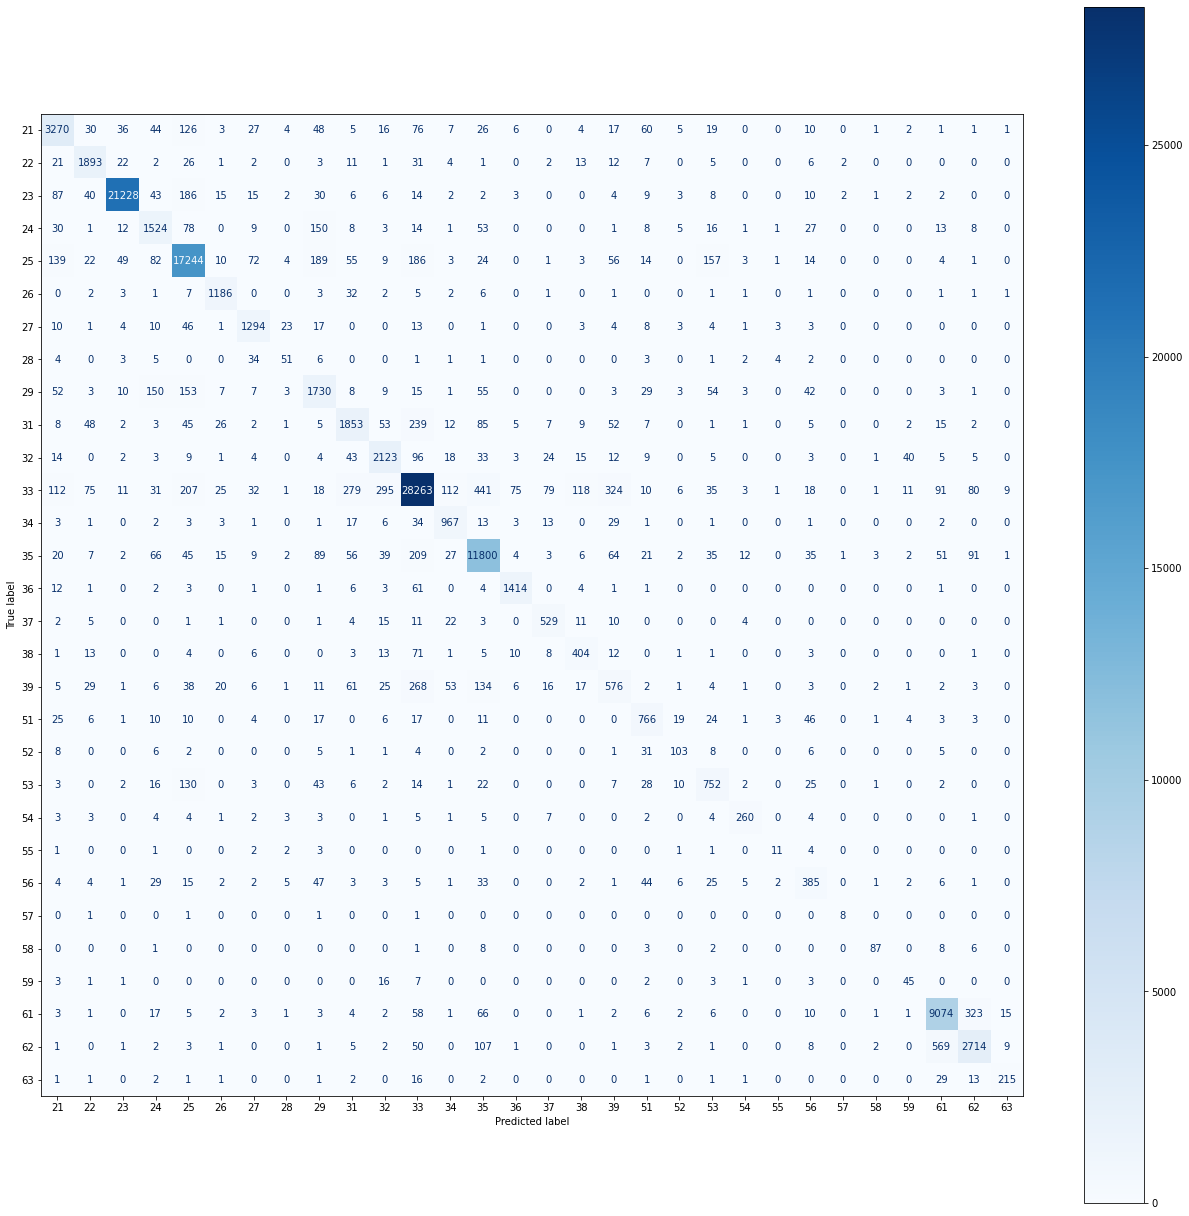

In [31]:
#Confusion Matrix 
plot_confusion_matrix(y_test, y_pred)

###Anterior

In [ ]:
#For large datasets consider using LinearSVC
model_c = LinearSVC(C=1.0, penalty='l2', class_weight='balanced', random_state=42, max_iter=1000, verbose=1)

In [ ]:
#Model
clf_c = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                    tokenizer=word_tokenize,
                                    strip_accents='ascii',
                                    max_features=None,
                                    lowercase=True)),
    ('svm', model_c)
])
clf_c.fit(X_train, y_train)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('vectorizer',
                 CountVectorizer(strip_accents='ascii',
                                 tokenizer=<function word_tokenize at 0x7f5e02271c20>)),
                ('svm',
                 LinearSVC(class_weight='balanced', random_state=42,
                           verbose=1))])

In [ ]:
# Classify
clfConcepto = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                    tokenizer=word_tokenize,
                                    max_features=None,
                                    lowercase=True)),
    ('linearsvc', LinearSVC(random_state=42))
])
clfConcepto.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('vectorizer',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x7f547564b320>)),
                ('linearsvc', LinearSVC(random_state=42))])

In [ ]:
# Let's see the results
y_pred = clf_c.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2100       0.81      0.78      0.80      4002
        2200       0.83      0.91      0.87      2089
        2300       0.99      0.97      0.98     21770
        2400       0.65      0.71      0.68      2047
        2500       0.90      0.92      0.91     19144
        2600       0.85      0.91      0.88      1266
        2700       0.81      0.84      0.82      1483
        2800       0.32      0.48      0.38       122
        2900       0.66      0.68      0.67      2399
        3100       0.64      0.68      0.66      2520
        3200       0.74      0.81      0.78      2481
        3300       0.94      0.87      0.91     30890
        3400       0.71      0.85      0.77      1104
        3500       0.89      0.88      0.89     12892
        3600       0.85      0.90      0.88      1540
        3700       0.69      0.83      0.75       630
        3800       0.50      0.68      0.57       558
        3900       0.38    

##SGDClassifier

In [32]:
#Model and hyperparameters
parametersSGD = { 
                 'SGD__max_iter':[200, 300, 500],
                 'SGD__loss':['modified_huber', 'squared_hinge', 'perceptron']
                 }
modelSGD = SGDClassifier(loss= 'perceptron', 
                         penalty= 'l2',
                         max_iter= 1000, 
                         n_jobs= -1,
                         class_weight= 'balanced',
                         learning_rate= 'optimal',  
                         early_stopping= True,
                         random_state=42, verbose=2)

In [33]:
#Model
clf_SGD = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                    ngram_range = (1,3),
                                    tokenizer=word_tokenize,
                                    strip_accents='ascii',
                                    max_features=None,
                                    lowercase=True)),
    ('SGD', modelSGD)
])

clf_GS_SGD = GridSearchCV(clf_SGD, parametersSGD, cv=2, n_jobs=-1, verbose=3)
clf_GS_SGD.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


-- Epoch 1
-- Epoch 1
Norm: 65.64, NNZs: 83806, Bias: -11.428549, T: 444287, Avg. loss: 0.737671
Total training time: 0.72 seconds.
Norm: 64.17, NNZs: 162078, Bias: -7.858387, T: 444287, Avg. loss: 1.074429
Total training time: 0.69 seconds.
-- Epoch 2
-- Epoch 2
Norm: 46.01, NNZs: 102947, Bias: -10.296841, T: 888574, Avg. loss: 0.065637
Total training time: 1.71 seconds.
Norm: 43.99, NNZs: 207100, Bias: -6.268222, T: 888574, Avg. loss: 0.127559
Total training time: 1.68 seconds.
-- Epoch 3
-- Epoch 3
Norm: 39.81, NNZs: 114728, Bias: -9.631213, T: 1332861, Avg. loss: 0.047437
Total training time: 2.70 seconds.
Norm: 36.59, NNZs: 235694, Bias: -5.370943, T: 1332861, Avg. loss: 0.078024
Total training time: 2.64 seconds.
-- Epoch 4
-- Epoch 4
Norm: 37.00, NNZs: 123238, Bias: -9.158743, T: 1777148, Avg. loss: 0.039707
Total training time: 3.70 seconds.
Norm: 32.44, NNZs: 255592, Bias: -4.775710, T: 1777148, Avg. loss: 0.059549
Total training time: 3.63 seconds.
-- Epoch 5
-- Epoch 5
Norm:

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(ngram_range=(1, 3),
                                                        strip_accents='ascii',
                                                        tokenizer=<function word_tokenize at 0x7ff1996f53b0>)),
                                       ('SGD',
                                        SGDClassifier(class_weight='balanced',
                                                      early_stopping=True,
                                                      loss='perceptron',
                                                      n_jobs=-1,
                                                      random_state=42,
                                                      verbose=2))]),
             n_jobs=-1,
             param_grid={'SGD__loss': ['modified_huber', 'squared_hinge',
                                       'perceptron'],
                         'SGD

In [34]:
#Model predictions
y_pred = clf_GS_SGD.predict(X_test)

In [35]:
#Model performance
describe_performance(clf_GS_SGD, y_test, y_pred)

Best parameters set found on training set:

best parameters:  {'SGD__loss': 'modified_huber', 'SGD__max_iter': 200}

Grid scores on testing set:

0.813 (+/-0.002) for {'SGD__loss': 'modified_huber', 'SGD__max_iter': 200}
0.813 (+/-0.002) for {'SGD__loss': 'modified_huber', 'SGD__max_iter': 300}
0.813 (+/-0.002) for {'SGD__loss': 'modified_huber', 'SGD__max_iter': 500}
0.744 (+/-0.005) for {'SGD__loss': 'squared_hinge', 'SGD__max_iter': 200}
0.744 (+/-0.005) for {'SGD__loss': 'squared_hinge', 'SGD__max_iter': 300}
0.744 (+/-0.005) for {'SGD__loss': 'squared_hinge', 'SGD__max_iter': 500}
0.783 (+/-0.013) for {'SGD__loss': 'perceptron', 'SGD__max_iter': 200}
0.783 (+/-0.013) for {'SGD__loss': 'perceptron', 'SGD__max_iter': 300}
0.783 (+/-0.013) for {'SGD__loss': 'perceptron', 'SGD__max_iter': 500}

best score:  0.8130832808435624

Grid times on testing set:

201.550 seconds (+/-14.203) for {'SGD__loss': 'modified_huber', 'SGD__max_iter': 200}
197.897 seconds (+/-16.840) for {'SGD__loss': 

<Figure size 432x288 with 0 Axes>

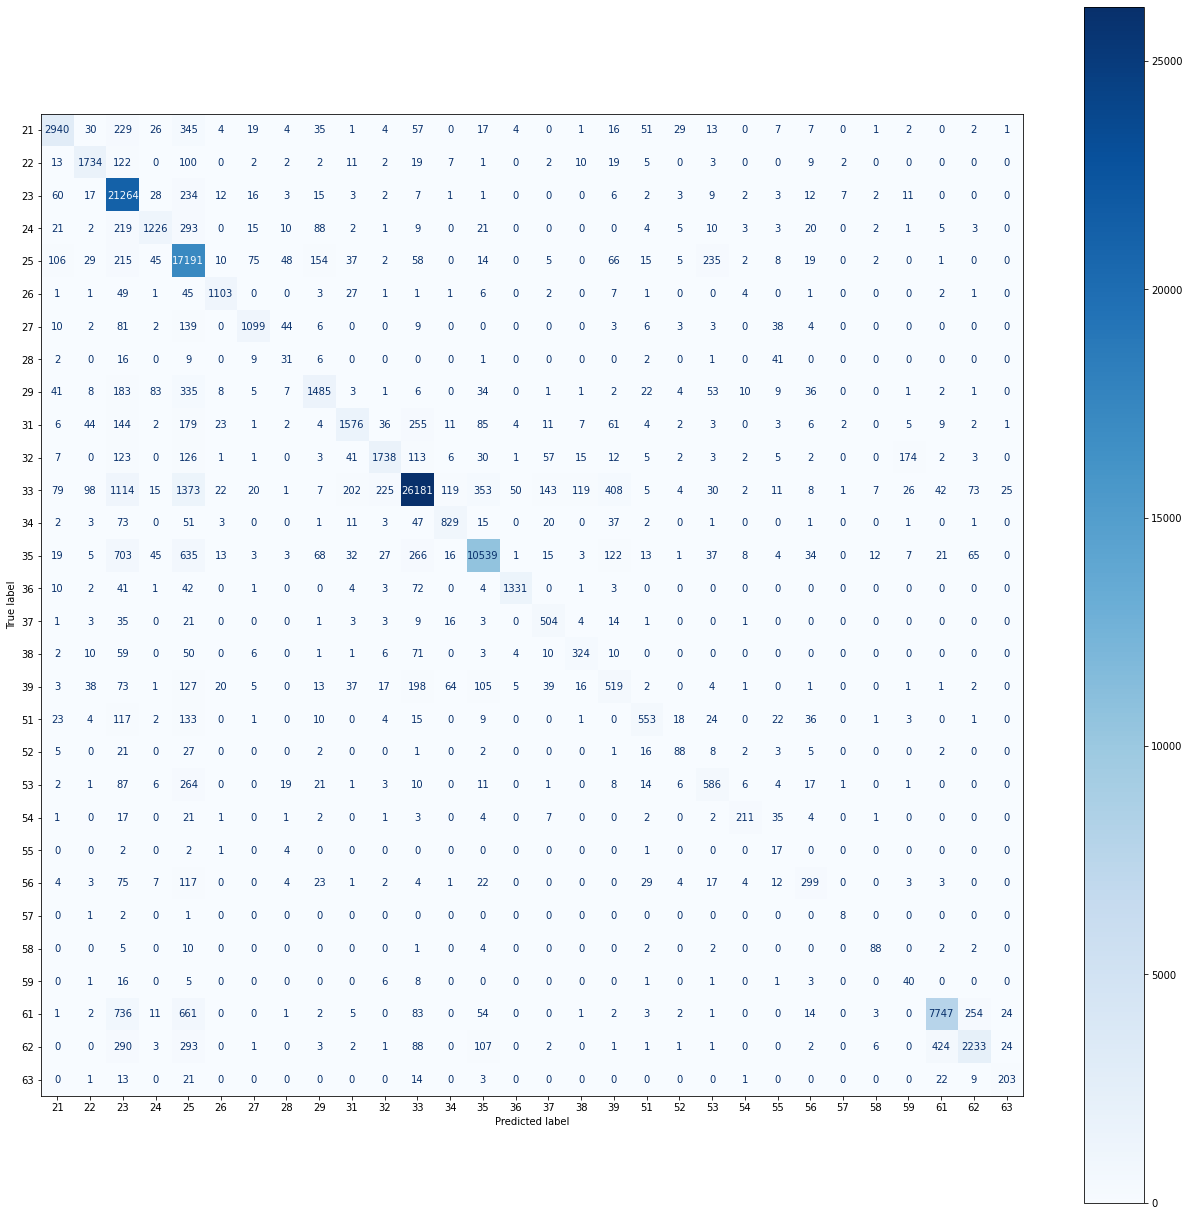

In [36]:
#Confusion Matrix 
plot_confusion_matrix(y_test, y_pred)

Esto se debe guardar